<a href="https://colab.research.google.com/github/Vishal35198/Waste-Classification/blob/main/Waster_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'waste-classification-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F233210%2F497253%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240703%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240703T063301Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc59216c7e2fceb491baf10bead8488406d8560a503b631cd6f760539ff1c173db7136d5122d4b59df03417d13b799f36c27b5a6652d61bb678637145119b9671814956a7bf7e48578c131d357647d2f77a97a4c4eba2b83481f02341adb6481fffeb27f2485b9f0b4716dcb4fbe79031b15b458169effca1fd933f75068032ea68b344d71903ea706fdb2ec64aadd88a0d1df2900652fb393f6224a70b6edb2e6d1274260c0729b70bcc7e57531cfbc8d39ced43fa9f6a737fe86cdd01dc6593bf3227440d7861a7856b5e70da34c42c39b64cf6f9b5253e05b13971103322eb16cc2469e694f547eea6aa88f8efc47782bdf08bef7ac67d4eefb012c5608bd7,densenet121/pytorch/trained/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F59973%2F71803%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240703%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240703T063302Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D235366a7a602a3bfdcacead0ad1bd0ec884cf3cad55f2db6b7d1fe7ad37af3ed91b89789b725fa972e5d3798bdbde1cc3d749994d3f467e3dbd09c1207174f64c9ed608f6e1b2abaa55ed56e8e6c43c95e504874c1cc08f76cf35ac6607099ffc080cda75c1fcc139f1dc4f8065368a8ea4542c693c1d3bd40e0edd74e267cdd92a27422db6ffd37df05b3a0ca3ff1db8300e98e55be83ad601e761b7d39f70117e8e9767643f0b2a3da5dcda2c985b1d4326d645f86bd289494d93344c4b77009e65c90ac023f033d492b571854038d8e9b44e6bf513cfeeada91b3c811e46602f0a9b8d27ccd5805d0ea4080f48064c3830dc9207109ca60c1cca67f22997e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 447914276 bytes downloaded
Downloaded and uncompressed: waste-classification-data
[==================================================] 26182907 bytes downloaded
Downloaded and uncompressed: densenet121/pytorch/trained/1
Data source import complete.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from torch import nn
import torch.nn.functional as F
from torchvision import datasets,models

In [3]:
torch.cuda.is_available()

True

# Data Augumentation

In [4]:
import torchvision.transforms as Transform
from torch.utils.data.sampler import SubsetRandomSampler
import torch.utils.data.dataloader as DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

In [5]:
num_workers = 0
batch_size = 32
val_size = 0.2

In [6]:
train_transform = Transform.Compose([
    Transform.RandomRotation(30),
    Transform.RandomResizedCrop(224),
    Transform.RandomHorizontalFlip(),
    Transform.ToTensor(),
    Transform.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
test_transform = Transform.Compose([Transform.Resize(255),
                                      Transform.CenterCrop(224),
                                      Transform.ToTensor(),
                                      Transform.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

loading the directory and test data

In [9]:
data_dir='../input/waste-classification-data/DATASET'
train_data = datasets.ImageFolder(data_dir + '/TRAIN', transform=train_transform)
test_data = datasets.ImageFolder(data_dir + '/TEST', transform=test_transform)

In [10]:
train_data.classes

['O', 'R']

In [11]:
val_size = 0.2

In [12]:
num_train = len(train_data)
batch_size = 32
num_workers = 0
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(num_train*val_size))
train_idx , val_idx = indices[split:],indices[:split]

# defining the sampler
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(val_idx)

# define the dataloader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
    num_workers=num_workers)


In [13]:
train_loader.batch_size

32

# Images Showing

In [14]:
classes = ['O','R']

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
def imshow(img):
    img = img/2 + 0.5
    plt.imshow(np.transpose(img,(1,2,0)))

In [ ]:
# dataiter = iter(train_loader)
# images,labels = dataiter.next()
# images = images.numpy()
# fig = plt.figure((25,4))
# for idx in np.arange(0,20):
#     ax = fig.subplot(2,20/2,idx+1,xticks = [],yticks = [])
#     imshow(imgages[idx])
#     ax.set_title(classes[labels[idx]])


In [16]:
def show_img(nrow):
    for images,labels in train_loader:
        plt.figure(figsize = (100,20))
        plt.axis('off')
        plt.imshow(make_grid(images,nrow = nrow).permute(1,2,0))
        break

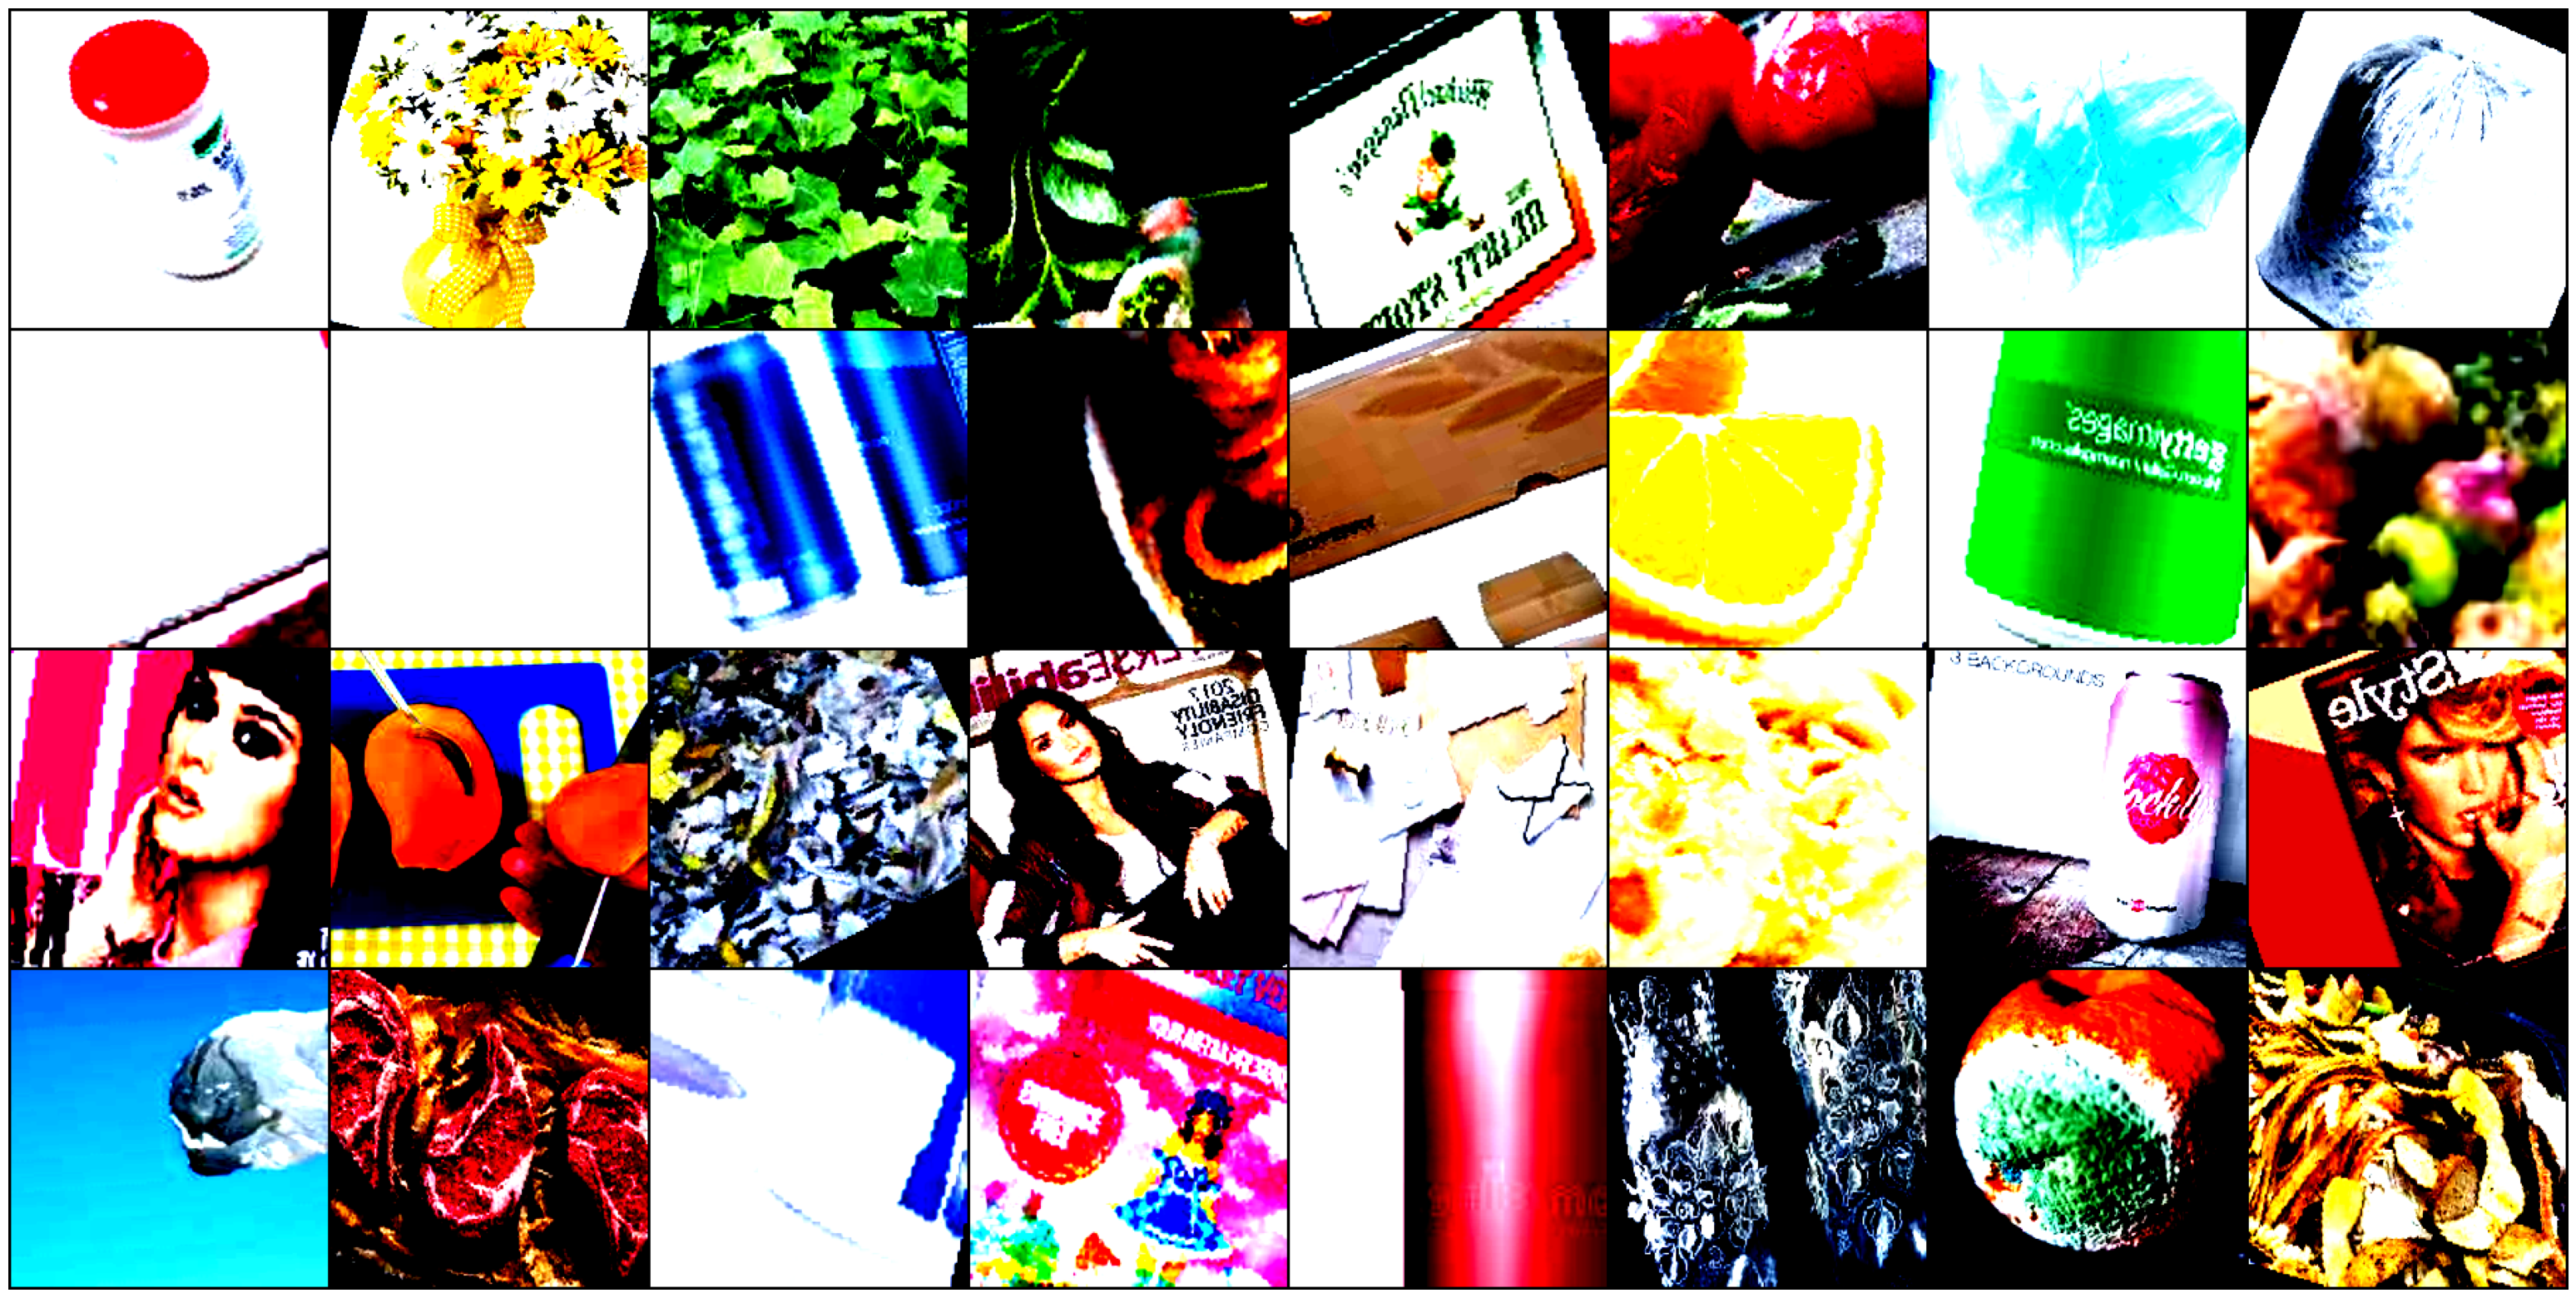

In [17]:
show_img(8)

# Loading the Model / Defining the Model

In [18]:
def accuracy(outputs,lables):
    _, preds = torch.max(outputs,dim = 1)
    return torch.tensor(torch.sum(outpus == labels).item()/ len(preds))

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import models

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class CustomDenseNet121(nn.Module):
    def __init__(self, num_classes):
        super(CustomDenseNet121, self).__init__()
        # Load the pre-trained DenseNet121 model
        self.densenet121 = models.densenet121()

        # Load local weights
#         self.densenet121.load_state_dict(torch.load(weights_path))

        # Replace the final fully connected layer
        in_features = self.densenet121.classifier.in_features
        self.densenet121.classifier = nn.Linear(in_features, num_classes)

        # Define a softmax layer
        self.softmax = nn.Softmax(dim=1)

        # Initialize loss function and optimizer
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.densenet121.parameters(), lr=0.001)

    def forward(self, x):
        x = self.densenet121(x)
        return self.softmax(x)

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))



In [20]:
model = CustomDenseNet121(2)

# GPau

In [21]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [22]:
def to_device(data,device):
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)

In [23]:
class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    return len(self.dl)


In [24]:
# puttin in to the GPU
train_dl = DeviceDataLoader(train_loader,get_default_device())
val_dl = DeviceDataLoader(valid_loader,get_default_device())
to_device(model,get_default_device())

CustomDenseNet121(
  (densenet121): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05

In [25]:
train_dl.device

device(type='cuda')

# train

In [26]:
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            inputs, targets = batch
            optimizer.zero_grad()
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [27]:
evaluate(model,val_dl)

{'val_loss': 0.7280436754226685, 'val_acc': 0.45035460591316223}

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_accuracies(history):
  accuracies = [x['val_acc']*100 for x in history]
  plt.plot(accuracies,'-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')


In [29]:
hi = []

In [30]:
hi += fit(5,0.08,model,train_dl,val_dl)

Epoch [0], train_loss: 0.5088, val_loss: 0.5151, val_acc: 0.7870
Epoch [1], train_loss: 0.4899, val_loss: 0.4849, val_acc: 0.8236
Epoch [2], train_loss: 0.4833, val_loss: 0.4708, val_acc: 0.8327
Epoch [3], train_loss: 0.4775, val_loss: 0.4653, val_acc: 0.8444
Epoch [4], train_loss: 0.4739, val_loss: 0.4599, val_acc: 0.8469


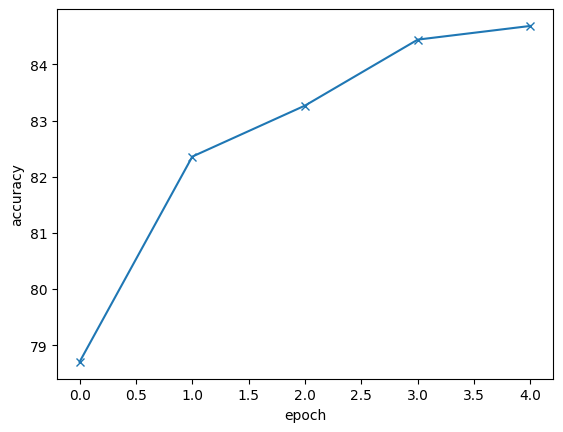

In [31]:
plot_accuracies(hi)

In [1]:
torch.save(model.state_dict(),'waste.pth')

NameError: name 'torch' is not defined

In [33]:
model.load_state_dict(torch.load('waste.pth'))

<All keys matched successfully>

In [34]:
test_dl = DeviceDataLoader(test_loader,get_default_device())

In [35]:
test_dl.device

device(type='cuda')

In [36]:
for images,labels in test_dl:
    output = model(images)
    _,preds = torch.max(output,dim = 1)
    break

In [37]:
def imshow(img):
    plt.axis('off')
    plt.imshow(img.numpy().transpose((1,2,0)),aspect = 'auto')

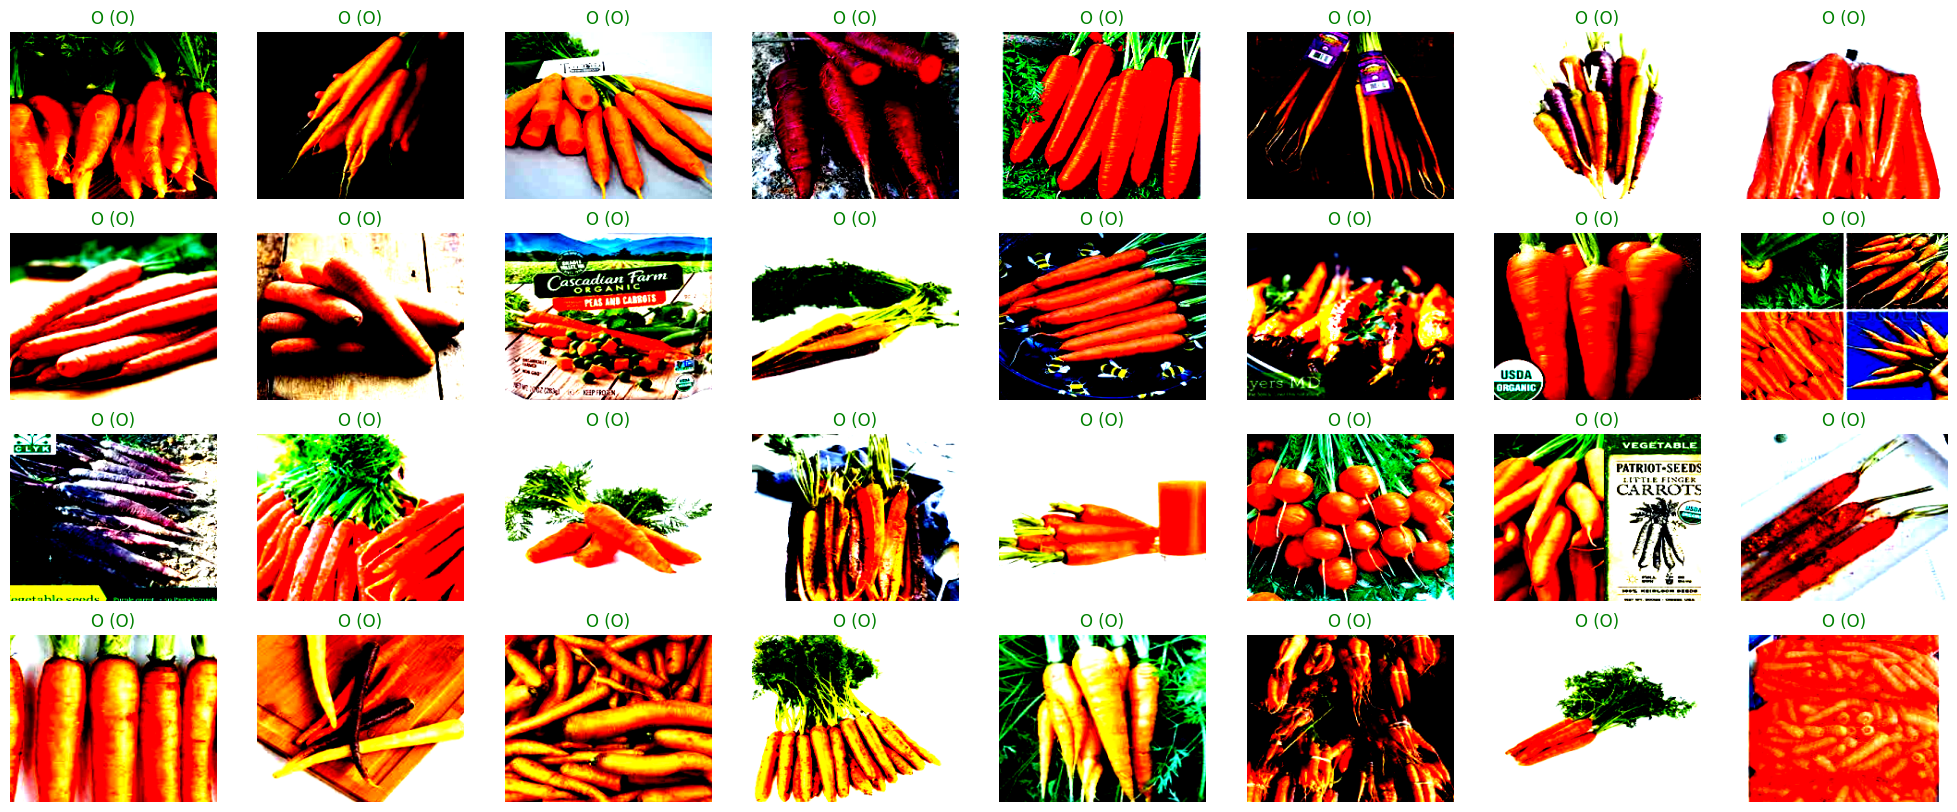

In [38]:
fig = plt.figure(figsize=(25,10))
for idx in np.arange(32):
    ax = fig.add_subplot(4, 8, idx + 1, xticks=[], yticks=[],)
    imshow(images.cpu()[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx] == labels[idx].item() else "red"))


In [39]:
fig.savefig('image.png')

In [40]:
fig.savefig('image.pdf')

In [41]:

import cv2

# Load the image
image = cv2.imread("/kaggle/working/image.png")
image = cv2.CVTCOLOR()
image.shape

AttributeError: module 'cv2' has no attribute 'CVTCOLOR'

In [ ]:
plt.axis('off')
plt.imshow(image,cmap = 'gray')
plt.title("Image Show")